# Chapter 5 - The MA Model


## Listing 5-1. Importing Stock Price data using Yahoo Finance package


In [1]:
import yfinance

data = yfinance.Ticker("MSFT").history(start="2019-01-01", end="2019-12-31")
data = data["Close"]
data

Date
2019-01-02 00:00:00-05:00     94.612633
2019-01-03 00:00:00-05:00     91.132004
2019-01-04 00:00:00-05:00     95.370491
2019-01-07 00:00:00-05:00     95.492104
2019-01-08 00:00:00-05:00     96.184486
                                ...    
2019-12-23 00:00:00-05:00    149.457870
2019-12-24 00:00:00-05:00    149.429367
2019-12-26 00:00:00-05:00    150.654205
2019-12-27 00:00:00-05:00    150.929596
2019-12-30 00:00:00-05:00    149.628784
Name: Close, Length: 251, dtype: float64

## Listing 5-2. Plotting the Stock Price data


<Axes: xlabel='Date'>

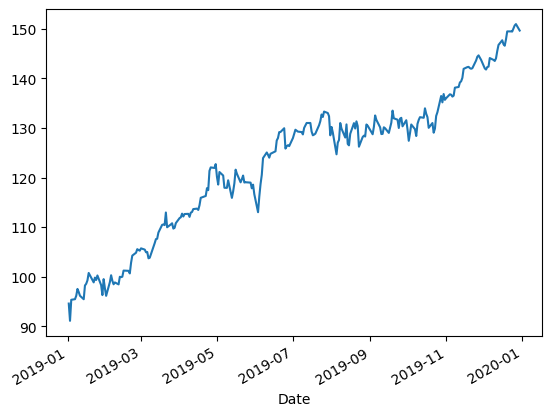

In [2]:
data.plot()

## Listing 5-3. Computing the differenced data and plotting it


<Axes: xlabel='Date', ylabel='Daily Difference in Stock Price'>

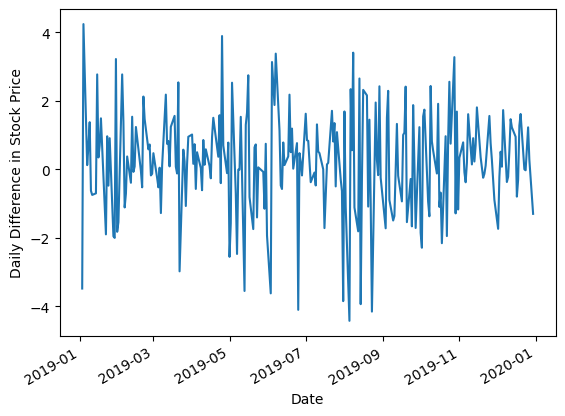

In [3]:
# Need to difference
data = data.diff().dropna()
data.plot(ylabel="Daily Difference in Stock Price")

## Listing 5-4. Applying an ADF test to the differenced data


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)

print(f"Time-Series is: {'stationary' if result[1] < 0.05 else 'non-stationary'}")

Time-Series is: stationary


## Listing 5-5. Plotting the Autocorrelation Function and the Partial Autocorrelation Function


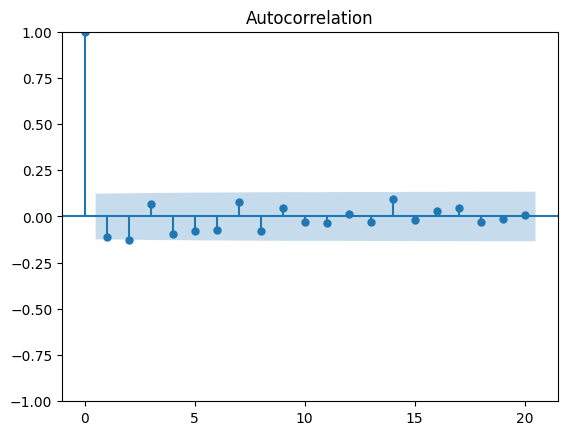

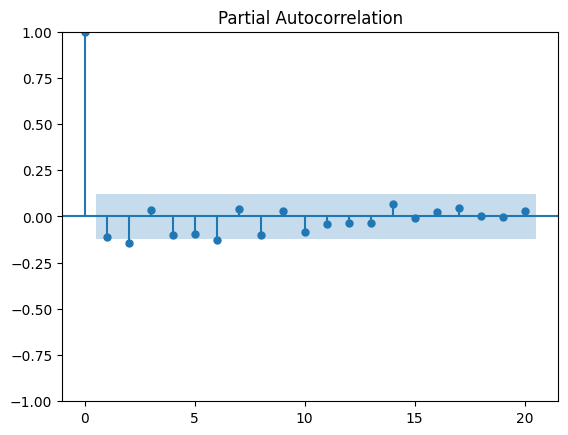

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_ = plot_acf(data, lags=20)
_ = plot_pacf(data, lags=20)

## Listing 5-6. Fitting the MA model and plotting the forecast


c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot b

0.5121191292296817


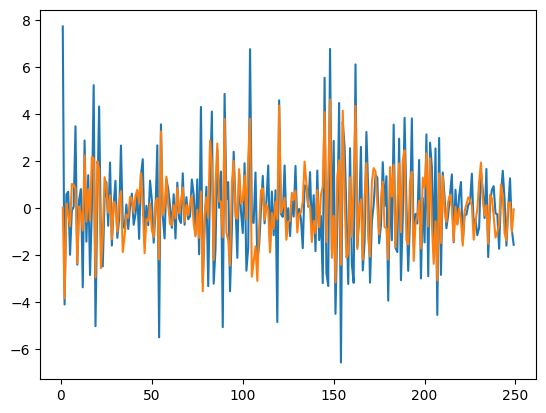

In [6]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Reset index to avoid date-related warnings in statsmodels
data = data.reset_index(drop=True)

# Calculate returns
returns = data.diff().dropna()

# Forecast the first MA(1) model
mod = ARIMA(returns, order=(0, 0, 1))
res = mod.fit()

pred = res.predict()

returns.plot()
pred.plot()

print(r2_score(returns, pred))

## Listing 5-7. Fitting the MA model on train data and evaluation the R2 score on train and test data


In [7]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Forecast the first MA(1) model
mod = ARIMA(train, order=(0, 0, 1))
res = mod.fit()

pred = res.predict()
fcst = res.forecast(steps=len(test))

print(r2_score(train, pred))
print(r2_score(test, fcst))

c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot b

0.51315568184873
0.11586341603487815


c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Listing 5-8. Plotting the out of sample forecast of the MA(1) model (MA with order 1)


<Axes: >

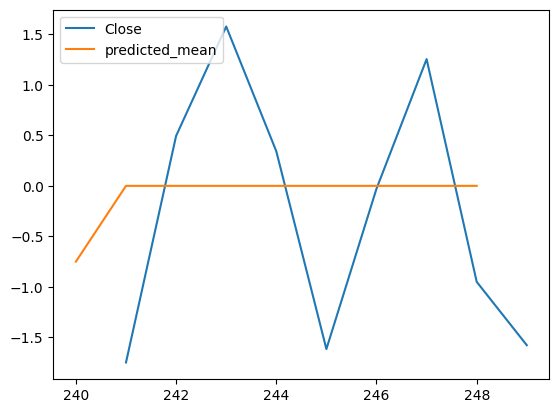

In [8]:
test.plot(legend=True)
fcst.plot(legend=True)

## Listing 5-9. Estimating the error of the MA(1) model for 10 refitted one-step forecasts


c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot b

R² Score: 0.3929


<Axes: >

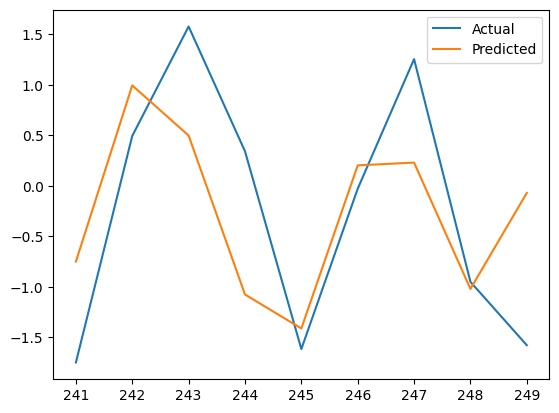

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Using .diff().dropna() directly on the Series/DataFrame
diff_data = data.diff().dropna()

train = diff_data.iloc[:240]
test = diff_data.iloc[240:250]

model = ARIMA(train, order=(0, 0, 1))
model_fit = model.fit()

# This updates the model state with new observations without re-estimating parameters
# which is the "modern" way to handle walk-forward validation in statsmodels.
history = model_fit
forecasts = []

for obs in test:
    # Predict the next step
    y_hat = history.forecast(steps=1).iloc[0]
    forecasts.append(y_hat)
    # Update the model with the actual observed value
    history = history.append([obs], refit=False)

# Conversion to Series for easy plotting/metrics
forecast_series = pd.Series(forecasts, index=test.index)

# Evaluation & Visualization
print(f"R² Score: {r2_score(test, forecast_series):.4f}")

test.plot(label="Actual", legend=True)
forecast_series.plot(label="Predicted", legend=True)

## Listing 5-10. Grid search to obtain the MA order that optimizes forecasting R2


In [10]:
import warnings
from tqdm import tqdm

warnings.filterwarnings(
    "ignore", message=".*Maximum Likelihood optimization failed to converge.*"
)
warnings.filterwarnings("ignore", message=".*Non-invertible starting MA parameters.*")


def evaluate2(order):
    train = list(data.diff().dropna()[0:240])
    test = list(data.diff().dropna()[240:250])

    fcst = []
    for step in range(len(test)):
        # Forecast the first MA(1) model
        mod = ARIMA(train, order=(0, 0, order))
        res = mod.fit()

        fcst += list(res.forecast(steps=1))
        train.append(test[step])

    return r2_score(test, fcst)


scores = []
for i in tqdm(range(1, 5)):
    scores.append((i, evaluate2(i)))

# observe best order is 3 with R2 of 0.49
scores = pd.DataFrame(scores)
print(scores[scores[1] == scores.max()[1]])

100%|██████████| 4/4 [00:16<00:00,  4.00s/it]

   0         1
3  4  0.493407


## Listing 5-11. Obtaining the final forecast


0.4920747018477498


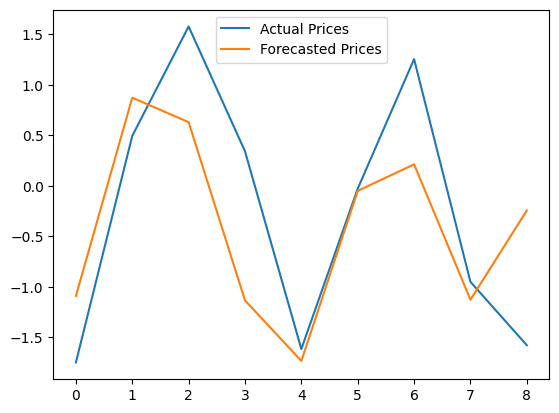

In [11]:
import matplotlib.pyplot as plt

train = list(data.diff().dropna()[0:240])
test = list(data.diff().dropna()[240:250])

orig_data = data.diff().dropna()

fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train, order=(0, 0, 3))
    res = mod.fit()
    pred = res.predict()

    fcst += list(res.forecast(steps=1))
    train.append(test[step])

print(r2_score(test, fcst))

plt.plot(test)
plt.plot(fcst)
plt.legend(["Actual Prices", "Forecasted Prices"])
plt.show()

In [12]:
import mlflow

# Start a new run
with mlflow.start_run():
    # Start mlflow autologging to log the model
    mlflow.autolog()

    train = list(data.diff().dropna()[0:240])
    test = list(data.diff().dropna()[240:250])

    orig_data = data.diff().dropna()

    fcst = []
    for step in range(len(test)):
        # Forecast the first MA(1) model
        mod = ARIMA(train, order=(0, 0, 3))
        res = mod.fit()

        pred = res.predict()
        fcst += list(res.forecast(steps=1))
        train.append(test[step])

    r2 = r2_score(test, fcst)

    # Log this metric to mlflow
    mlflow.log_metric("r2_score_test", r2)

2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/19 22:22:56 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/19 22:22:56 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/19 22:22:56 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/19 22:22:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2026/02/19 22:23:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2026/02/19 22:23:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please 